# Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from MetabolomicsPaper.GeneralHelperFunctions import *

paper_dir = '/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Metabolon/Paper_v6/'
figure_dir = os.path.join(paper_dir, 'BMI_replications')
make_dir_if_not_exists(figure_dir)
os.chdir(paper_dir)

/usr/wisdom/python-3.7.4/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data

In [2]:
mar17_stool_info = pd.read_csv('dataframes/mar17_stool_info.csv', index_col=0)
may18_stool_info = pd.read_csv('dataframes/may18_stool_info.csv', index_col=0)
mar17_features = pd.read_csv('dataframes/mar17_features.csv', index_col=0)
metabs1 = pd.read_csv('dataframes/metabs1.csv', index_col=0)

grouped_metabs = pd.read_csv('../technical_noise/dataframes/mar17_metabolomics_grouped085_unnormed_fillna_min_dayfromfirstsample_regressed_rzs.csv', index_col=0)
single_metabs = pd.read_csv('../technical_noise/dataframes/mar17_metabolomics_unnormed_fillna_min_dayfromfirstsample_regressed_rzs.csv', index_col=0)
grouped_metabs_sp = pd.read_csv('../technical_noise/dataframes/mar17_metabolomics_grouped085_unnormed_fillna_min_dayfromfirstsample_regressed_metabs.csv', index_col=0).loc[grouped_metabs.columns]
grouped_metabs_sp = grouped_metabs_sp.replace({'Lipid':'Lipids', 'Nucleotide':'Nucleotides', 'Amino Acid':'Amino acids', 'Peptide':'Peptides', 
                                               'Xenobiotic':'Xenobiotics', 'Unknown':'Unknowns', 'Carbohydrate':'Carbohydrates'})

# Cirulli et al.

In [4]:
s1 = pd.read_excel('/net/mraid08/export/jafar/Microbiome/Analyses/Noamba/Metabolon/BMI_paper/1-s2.0-S1550413118306302-mmc2.xlsx')
s1 = s1[s1['49 definitive BMI-associated metabolites'] == 1]
s1 = s1[['Metabolite ID', 'direction of effect', 'Mean r2']]
s1['res'] = [1*s1.loc[s, 'Mean r2'] if s1.loc[s, 'direction of effect'] == 'pos' else -1*s1.loc[s, 'Mean r2'] for s in s1.index]

s2 = pd.concat((single_metabs, mar17_features[['BMI']]), axis=1).dropna()
bmi_corr = [pearsonr(s2[s], s2['BMI'])[0] if s in metabs1.CHEMICAL_ID.values else np.nan for s in s1['Metabolite ID'].astype(str)]
# bmi_corr = [np.sign(b) * b**2 for b in bmi_corr]
s1['BMI_corr'] = [np.sign(b) * b**2 for b in bmi_corr]

## Supp table

In [6]:
s1.drop(['direction of effect', 'Mean r2'], axis=1).rename(columns={'Metabolite ID':'CHEMICAL_ID', 'res':'Cirulli et al. Mean r2 multiplied by effect direction', 
                   'BMI_corr': 'Bar et al.  r2 multiplied by effect direction'}).set_index('CHEMICAL_ID').to_csv('Supp_table2_bmi_replication.csv')

# Plot

## A

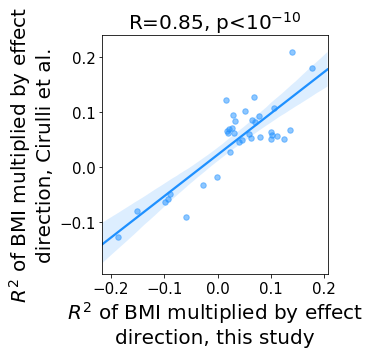

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

label_size = 20
tick_size = 15

sns.regplot(s1[['BMI_corr', 'res']].dropna()['BMI_corr'], s1[['BMI_corr', 'res']].dropna()['res'], ax=ax, scatter_kws={'s':30, 'alpha':0.5, 'color':'dodgerblue'}, color='dodgerblue')
r, p = pearsonr(s1[['BMI_corr', 'res']].dropna()['BMI_corr'], s1[['BMI_corr', 'res']].dropna()['res'])
ax.set_title('R=%0.2f, p<10$^{%0.2d}$'%(r, p_base10(p)), fontsize=label_size)

ax.tick_params(labelsize=tick_size)
ax.set_xlabel(r'$R^2$' + ' of BMI multiplied by effect\ndirection, this study', fontsize=label_size)
ax.set_ylabel(r'$R^2$' + ' of BMI multiplied by effect\ndirection, Cirulli et al.', fontsize=label_size)

fig.tight_layout()

# plt.text(-0.2, 1.05, 'a', ha='center', va='center', transform=ax.transAxes, fontsize=30, weight='bold')

# fig.tight_layout()
plt.savefig(os.path.join(figure_dir, 'Supp_A_BMI_replication_scatterplots_small.png'), dpi=200, bbox_inches='tight')
plt.savefig(os.path.join(figure_dir, 'Supp_A_BMI_replication_scatterplots.png'), dpi=1200, bbox_inches='tight')